# BUSINESS QUESTIONS
* What is highest and lowest budgets used and for which movies
* What is the target audience(target genre)
* Which movies have the highest icome and the genre as well
* The top performing studios

#  MICROSOFT MOVIE PROJECT

The aim of this projct is to give high reccommendations of movies Microsoft can use to create. Analysis will be performed moreso correlation to give us the reccoommendations Microsoft can use. EDA and data analysis will be performed. Also answered are the business questions helped to formulate the recommendation ad solution that will be provided.

#  1)In depth understanding of the Data

In [125]:
#Import the libraries needed: pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import zipfile
%matplotlib inline

In [126]:
#load the datasets that will be used 
bom_movie_df = pd.read_csv('zippedData/bom.movie_gross.csv', index_col=0)

#load the dataset #tn.movie_budgets.csv
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv', index_col=0)


#load the dataset # rt.movie_info.tsv
movieinfo_df = pd.read_csv('zippedData/rt.movie_info.tsv', sep = '\t')


#load the dataset #tmdb.movies.csz
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)

#load the dataset im.db

In [127]:
bom_movie_df = pd.read_csv('zippedData/bom.movie_gross.csv', index_col=0)
bom_movie_df

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [128]:
bom_movie_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [129]:
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv', index_col=0)
tn_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [130]:
tn_df.describe()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,24,3,231,548,367


#  Merge the tables that will be required

 bom_movie_df ' and ' tn_df '. In this case the recommended method of joining the tables is by use of concact method. using the join method in this case overlaps the columns and also some of these columns have a differrent data type, hence recommend concact. Shape of the merged data With the merged dataset we have to know the shape of the dataset. Columns, rows, statistics in this case the mean, median and standard deviation.

In [131]:
#merged data 
new_movie_df = pd.merge(bom_movie_df,tn_df, how = "inner", left_on="title",right_on ="movie")
new_movie_df

,studio,domestic_gross_x,foreign_gross,year,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,BV,415000000.0,652000000,2010,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,WB,292600000.0,535700000,2010,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,P/DW,238700000.0,513900000,2010,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,Sum.,300500000.0,398000000,2010,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Par.,312400000.0,311500000,2010,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...
1242,VE,4300000.0,NaN,2018,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100"
1243,RAtt.,3700000.0,NaN,2018,"Dec 7, 2018",Ben is Back,"$13,000,000","$3,703,182","$9,633,111"
1244,VE,491000.0,1700000,2018,"Feb 2, 2018",Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"
1245,RLJ,1200000.0,NaN,2018,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","$1,427,656"


In [132]:
#In this case we have 9169 rows and 8 columns
new_movie_df.shape

(1247, 9)

In [133]:
#The .columns() function is used to identify the column names of the dataframe
new_movie_df.columns

Index(['studio', 'domestic_gross_x', 'foreign_gross', 'year', 'release_date',
       'movie', 'production_budget', 'domestic_gross_y', 'worldwide_gross'],
      dtype='object')

In [134]:
#Used the .info() function to give the column names and the datatypes. In this case there are two types of data types object and float
new_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   studio             1246 non-null   object 
 1   domestic_gross_x   1245 non-null   float64
 2   foreign_gross      1086 non-null   object 
 3   year               1247 non-null   int64  
 4   release_date       1247 non-null   object 
 5   movie              1247 non-null   object 
 6   production_budget  1247 non-null   object 
 7   domestic_gross_y   1247 non-null   object 
 8   worldwide_gross    1247 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 97.4+ KB


In [135]:
#Change the 'Year' to the Dtype 'Object'
new_movie_df = new_movie_df.astype({'year':'object'})
new_movie_df.dtypes

studio                object
domestic_gross_x     float64
foreign_gross         object
year                  object
release_date          object
movie                 object
production_budget     object
domestic_gross_y      object
worldwide_gross       object
dtype: object

In [136]:
#To know the statistics of the data: Mean, Median and std, count etc 
new_movie_df.describe()

,domestic_gross_x
count,1.245000e+03
mean,6.062353e+07
std,8.477607e+07
min,8.000000e+02
25%,7.500000e+06
50%,3.340000e+07
75%,7.420000e+07
max,7.001000e+08


# 2 )Data Preparation

With the merged dataset, we have to perform EDA. In this case, we identify duplicated values, missing values and the percentage of the missing values. Using the Percentage in this case will give us a method or rather solution to the missing values: drop the missing values or use diffrerent methods to fill the missing values. Henceforth, we perform data cleaning to reduce inconsistency and improve accuracy

#  2.1) Check for duplicate values

In [137]:
#Identify the duplicated values and check how many we have.
new_movie_df.duplicated().value_counts()

False    1247
dtype: int64

In [138]:
#We reomove the duplicated values and this makes a diffrence from the previous. 
new_movie_df = new_movie_df.drop_duplicates()
new_movie_df.shape

(1247, 9)

# 2.1) Missing values

In [139]:
#We check for missing values in the merged dataframe, represented by Nan(null values) and show the number of Nan values in the dataset
new_movie_df.isna().sum()

studio                 1
domestic_gross_x       2
foreign_gross        161
year                   0
release_date           0
movie                  0
production_budget      0
domestic_gross_y       0
worldwide_gross        0
dtype: int64

In [140]:
#Check the percentage of missing values for 'foreign_gross' column since it has the highest number of issing values 
print('Percentage of Null foreign_gross Values:', len(new_movie_df[new_movie_df.foreign_gross.isna()])/ len(new_movie_df))

Percentage of Null foreign_gross Values: 0.12910986367281477


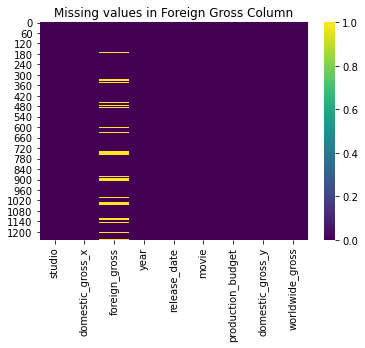

In [141]:
#Visually represent the missing values with a heatmap
sns.heatmap(new_movie_df.isnull(), cmap = 'viridis')
plt.title('Missing values in Foreign Gross Column')
plt.show()

In [142]:
#Convert 'foreign_gross' column to a numeric data type
new_movie_df['foreign_gross'] = pd.to_numeric(new_movie_df['foreign_gross'], errors='coerce')

#Calculate the mean and median of the foreign_gross column in 'new_movie_budget_df'

foreign_gross_mean = new_movie_df['foreign_gross'].mean()
foreign_gross_median = new_movie_df['foreign_gross'].median()


print("Mean Value for foreign_gross column: {}".format(foreign_gross_mean))
print("Median Value for foreign_gross column: {}".format(foreign_gross_median))

Mean Value for foreign_gross column: 100945897.5896488
Median Value for foreign_gross column: 38050000.0


In [143]:
new_movie_df['foreign_gross'].isna().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1242     True
1243     True
1244    False
1245     True
1246     True
Name: foreign_gross, Length: 1247, dtype: bool>

In [144]:
new_movie_df['production_budget'] =new_movie_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
new_movie_df['worldwide_gross'] =new_movie_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)
new_movie_df['domestic_gross_x'] =new_movie_df['domestic_gross_x'].replace('[\$,]', '', regex=True).astype(float)
new_movie_df['domestic_gross_y'] =new_movie_df['domestic_gross_y'].replace('[\$,]', '', regex=True).astype(float)

# Clean the merged data 'reviews_df'
* This is a dataframe that consist of 'tn_df' and 'movieinfo_df') 

In [155]:
reviews_df = pd.merge(tn_df, movieinfo_df, how = "inner", left_on="id", right_on ="id")

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,1,"May 29, 2009",Up,"$175,000,000","$293,004,164","$731,463,377","This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
2,1,"Mar 7, 2014",Mr. Peabody & Sherman,"$145,000,000","$111,506,430","$269,806,430","This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,1,"Dec 17, 2010",How Do You Know?,"$120,000,000","$30,212,620","$49,628,177","This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
4,1,"Dec 11, 2015",In the Heart of the Sea,"$100,000,000","$25,020,758","$89,693,309","This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,100,"Dec 31, 2013",Heli,"$1,000,000",$0,"$552,614",Four old college friends in their forties come...,NR,Comedy|Drama,Willem van de Sande Bakhuyzen,NaN,NaN,NaN,NaN,NaN,108 minutes,NaN
4678,100,"Oct 11, 2013",Escape from Tomorrow,"$650,000","$171,962","$171,962",Four old college friends in their forties come...,NR,Comedy|Drama,Willem van de Sande Bakhuyzen,NaN,NaN,NaN,NaN,NaN,108 minutes,NaN
4679,100,"Jul 11, 2014",As It Is in Heaven,"$450,000","$13,486","$13,486",Four old college friends in their forties come...,NR,Comedy|Drama,Willem van de Sande Bakhuyzen,NaN,NaN,NaN,NaN,NaN,108 minutes,NaN
4680,100,"Dec 31, 2014",Horse Camp,"$250,000",$0,$0,Four old college friends in their forties come...,NR,Comedy|Drama,Willem van de Sande Bakhuyzen,NaN,NaN,NaN,NaN,NaN,108 minutes,NaN


In [157]:
#Drop the columns with missing values
reviews_df = reviews_df.dropna()
reviews_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
58,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
59,3,"Nov 21, 2018",Ralph Breaks The Internet,"$175,000,000","$201,091,711","$524,283,695","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
60,3,"Apr 8, 2005",Sahara,"$145,000,000","$68,671,925","$121,671,925","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
61,3,"Oct 5, 2018",Venom,"$116,000,000","$213,511,408","$853,628,605","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
62,3,"Feb 18, 2005",Son of the Mask,"$100,000,000","$17,018,422","$59,918,422","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


# Data Analysis


#  i) What was the Highest profit?
* The data for analysis used in this case is the new merged data
* The output in this case will be based on the worldwide and domestic gross to give the profits made
* Also we need to find the movie that made the highest profit
* Plot showing the profit made

In [106]:
#Created a column called profit_needed 
new_movie_df["profit_made"] = (new_movie_df["worldwide_gross"] - new_movie_df["domestic_gross_y"])


#Find the highest profit
highest_profit = new_movie_df["profit_made"].max()

print("The highest profit made is:" , highest_profit)

The highest profit made is: 1369318718.0


In [107]:
#Calculating the percentage profit
new_movie_df["percentage_profit"] = (new_movie_df["profit_made"] / new_movie_df["production_budget"]) * 100

# Finding the highest percentage
highest_percentage_profit = new_movie_df["percentage_profit"].max()

print("The highest percentage profit made is:", highest_percentage_profit)

The highest percentage profit made is: 18892.064


In [108]:
#Find the movies that made the highest profit 
profitable_movies = new_movie_df[new_movie_df["profit_made"] >0]["movie"].tolist()

#To find the movie that made the highest profit
highest_profit = new_movie_df['profit_made'].idxmax()
highest_profit_movie = new_movie_df.loc[highest_profit]['movie']

print("The movie with the highest profit made is", highest_profit_movie)

The movie with the highest profit made is Avengers: Infinity War


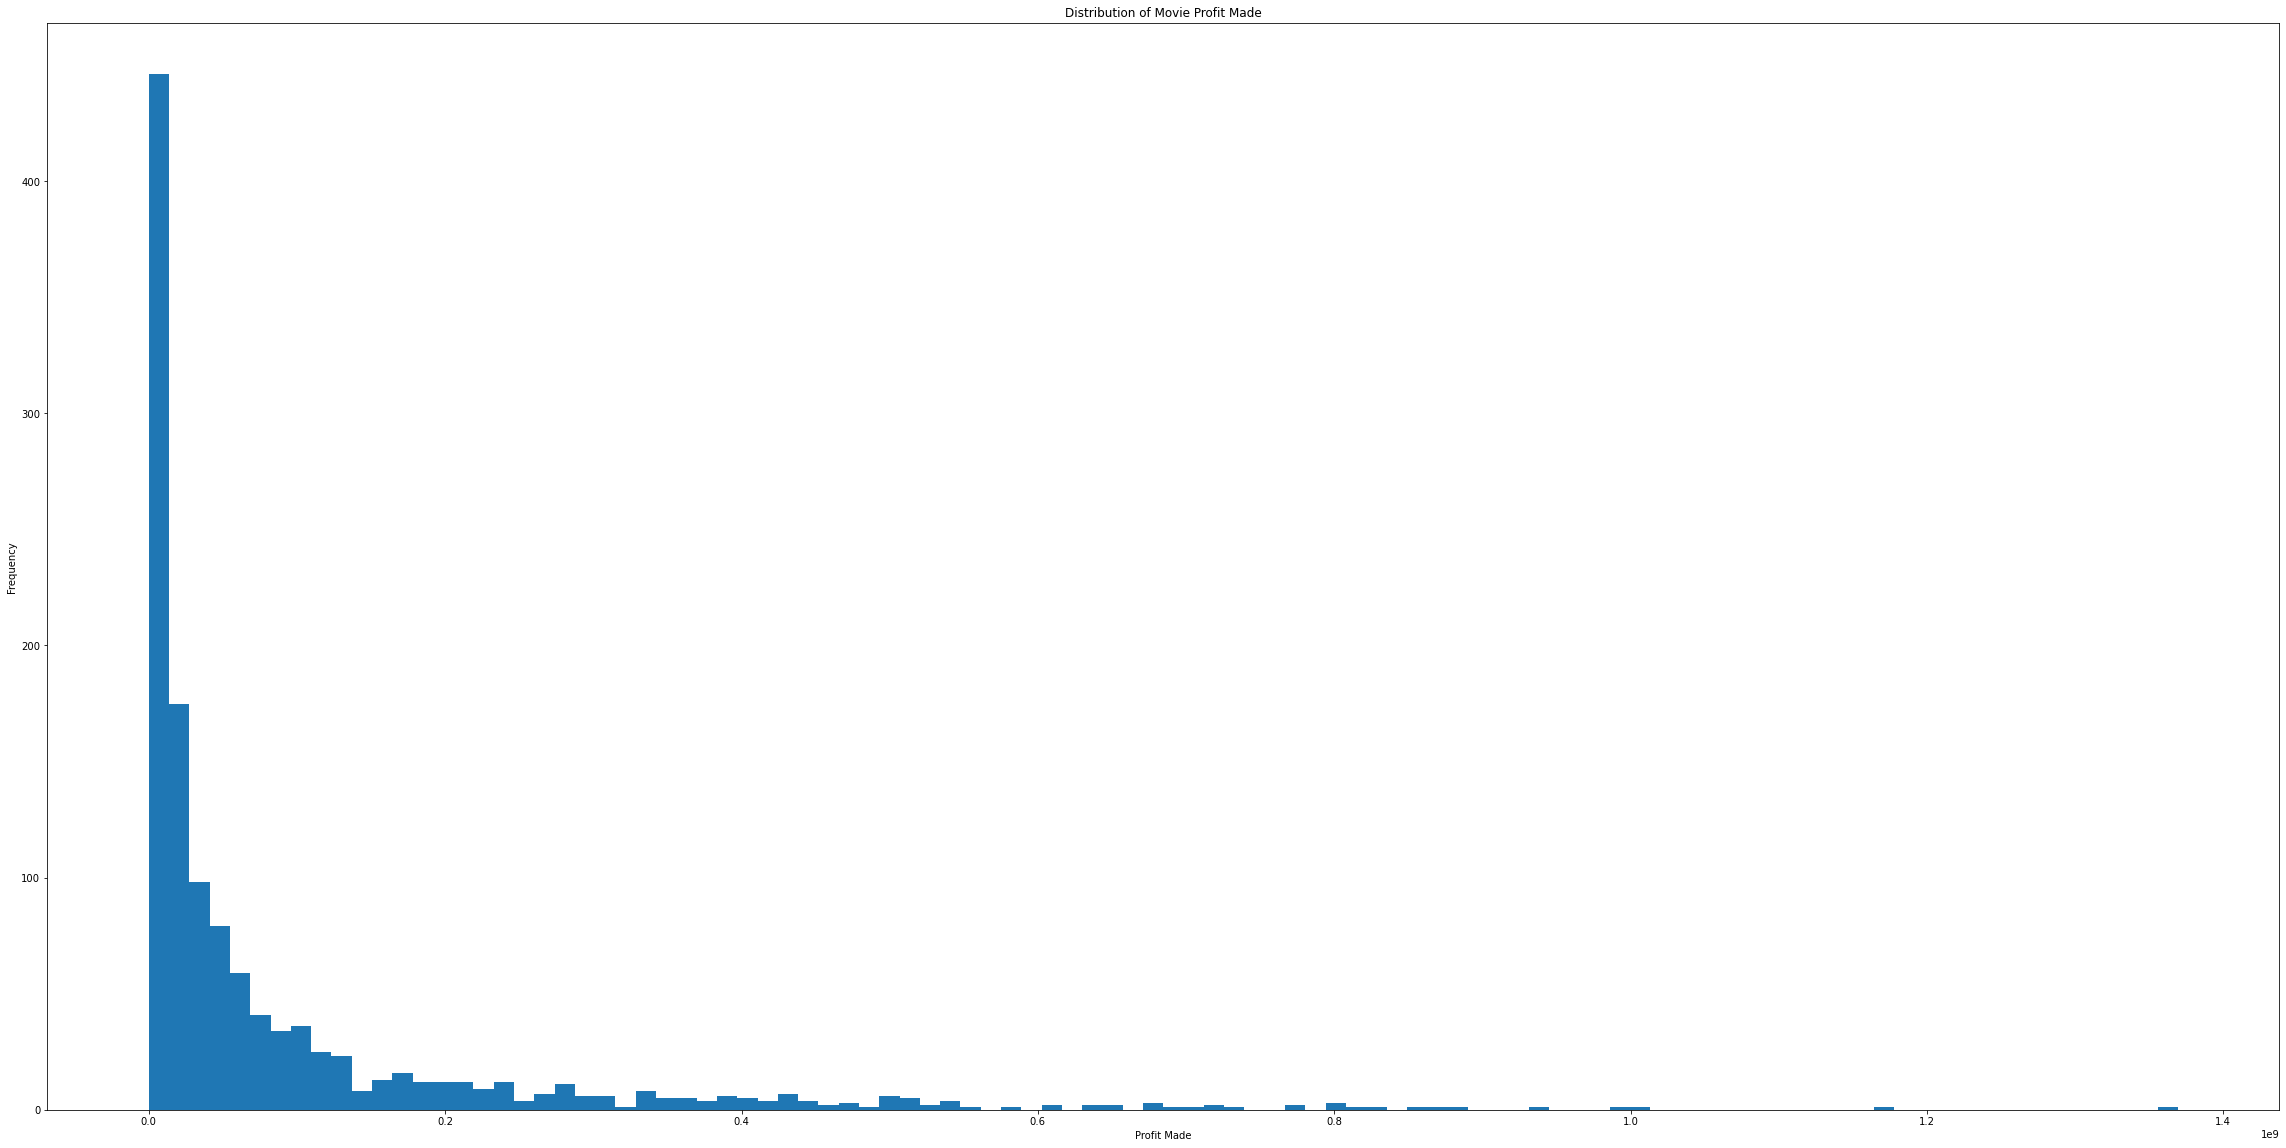

In [109]:
#Plot a histogram of the profits made 
fg, ax = plt.subplots(figsize=(40, 20))
x = new_movie_df["profit_made"]
y = new_movie_df["movie"]

plt.hist(new_movie_df['profit_made'], bins=100)
plt.xlabel('Profit Made')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Profit Made')
plt.show()

#  ii) What's the company's focal point
* This will depend on the foreign_gross and domestic_gross_y(the sales made)
* Plot the domestic sales and foreign sales.


In [112]:
print('The average domestic sales: {} \nThe average foreign sales: {}'.format(
                                                                       new_movie_df["domestic_gross_x"].mean(),
                                                                       new_movie_df["worldwide_gross"].mean()))
print('The Difference: {}'.format(
                            (new_movie_df["domestic_gross_x"].mean()-new_movie_df["worldwide_gross"]).mean()))

The average domestic sales: 60623530.9124498 
The average foreign sales: 152125895.94947875
The Difference: -91502365.03702894


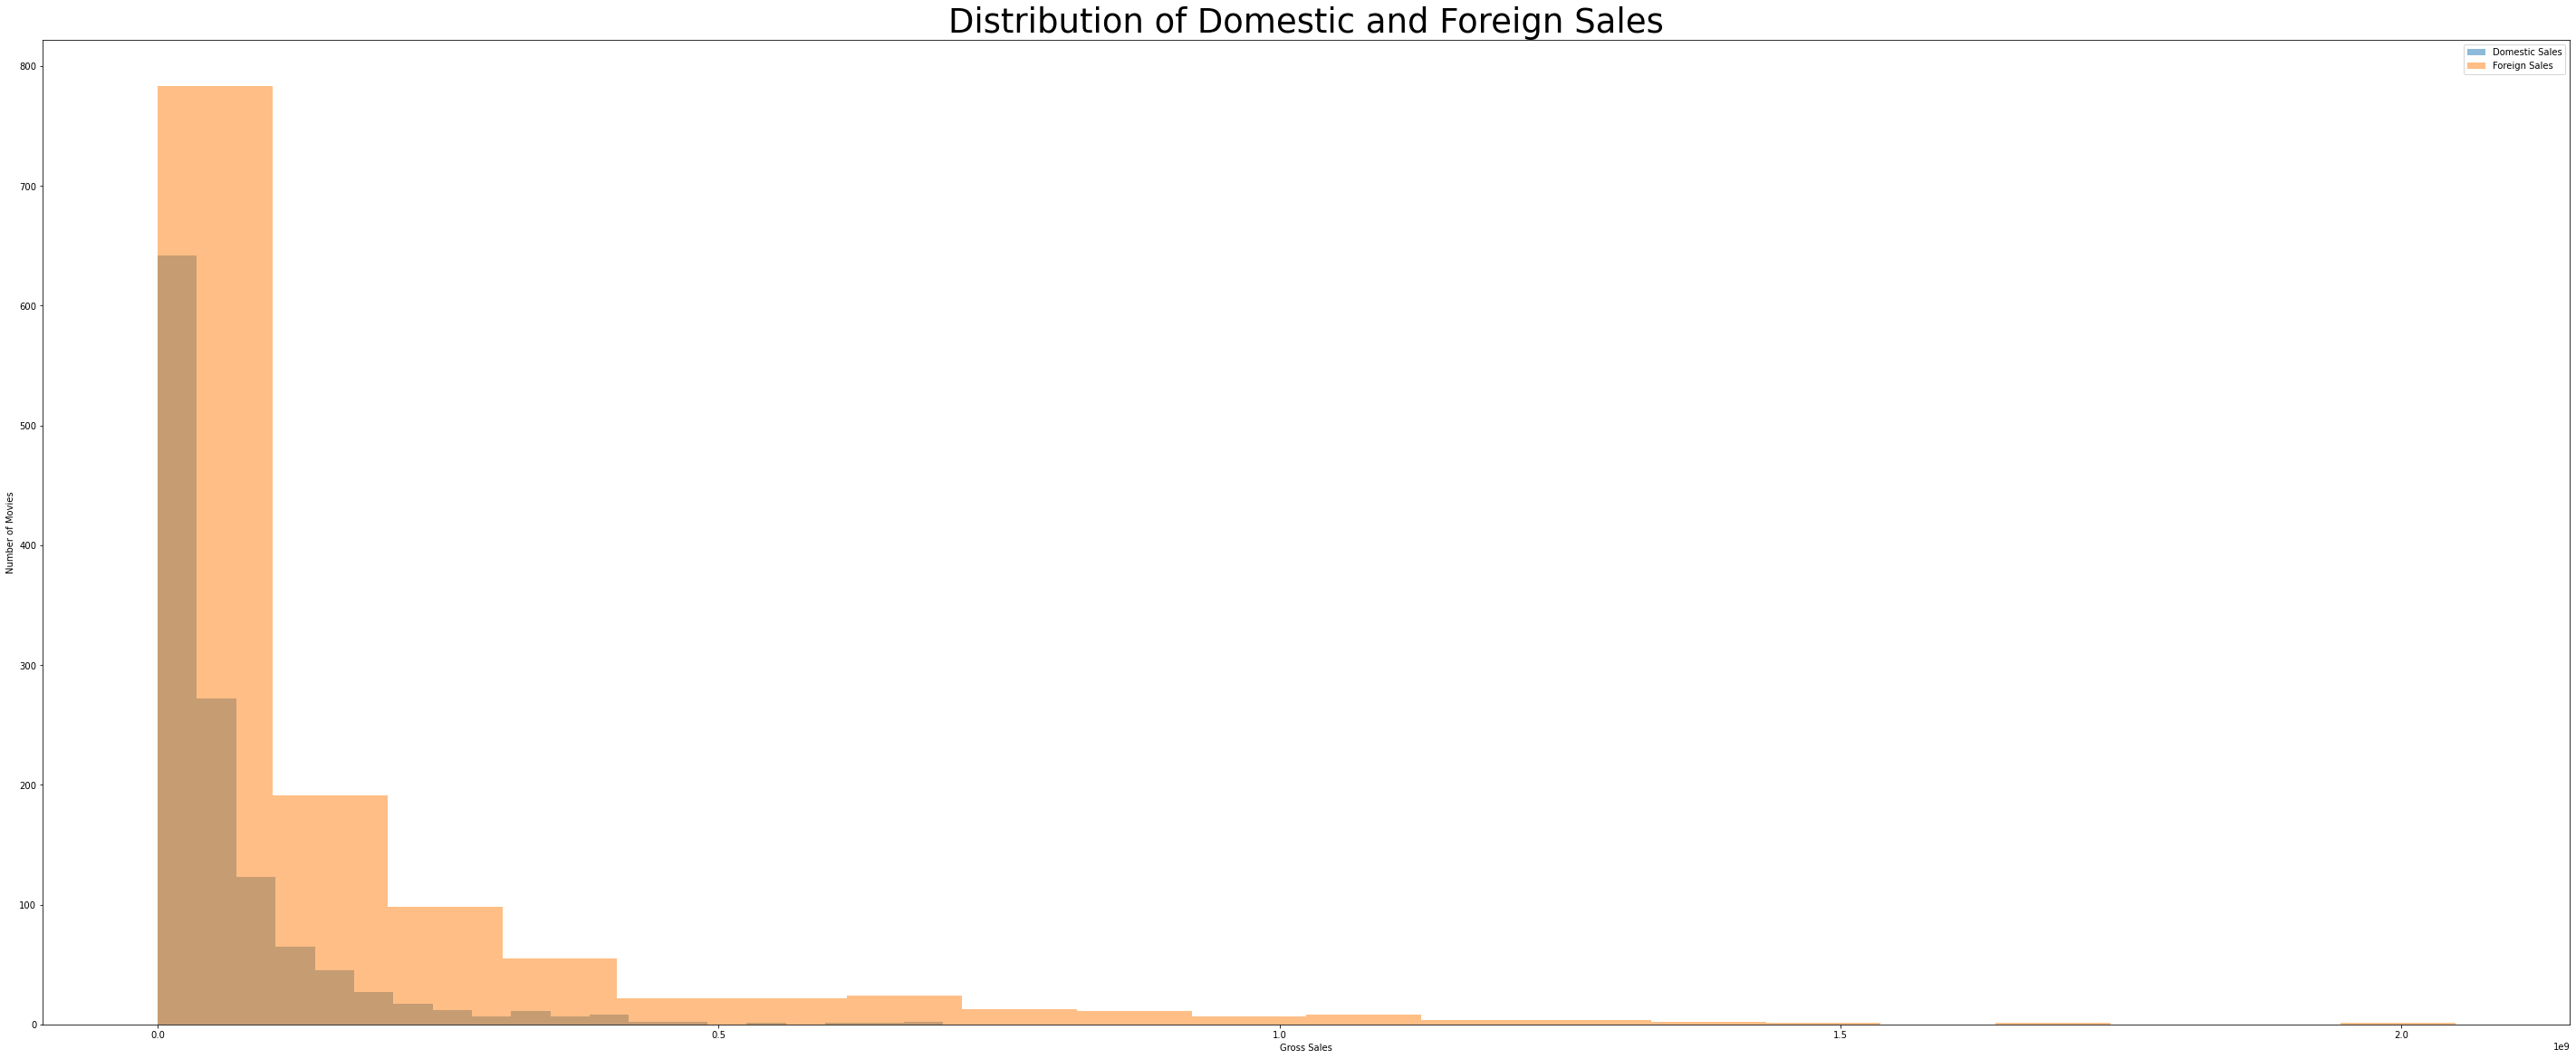

In [115]:
#Set to plot
fg, ax = plt.subplots(figsize=(50, 20))

# Define the domestic and foreign sales
plt.hist(new_movie_df['domestic_gross_x'], bins=20, alpha=0.5, label='Domestic Sales')
plt.hist(new_movie_df['worldwide_gross'], bins=20, alpha=0.5, label='Foreign Sales')

#Label the axes
plt.xlabel('Gross Sales')
plt.ylabel('Number of Movies')
plt.title('Distribution of Domestic and Foreign Sales', fontsize=37)
plt.legend()
plt.show()

#  Which movies brought in the highest income.
* In this case we want to find the first 20 movies that brought the highest income
* The output is based on 'domestic_gross and worldwide_gross
* Plot showing the income and movies

In [116]:
# Select the necessary columns
movie_income = new_movie_df[["movie", "domestic_gross_y", "worldwide_gross"]]

# Calculate the total income for each movie
movie_income.loc[:,"total_income"] = movie_income["domestic_gross_y"] + movie_income["worldwide_gross"]

# Sort the movies by total income in descending order
movie_income = movie_income.sort_values(by="total_income", ascending=False)

# Get the top 10 highest income movies
top20_movies = movie_income.head(10)

#Print the list of High Income movies
print("Top 20 Movies with Highest Income")

print(top20_movies["movie"])

Top 20 Movies with Highest Income
1154            Avengers: Infinity War
764                     Jurassic World
1155                     Black Panther
765                          Furious 7
766            Avengers: Age of Ultron
1157                     Incredibles 2
1156    Jurassic World: Fallen Kingdom
496                             Frozen
497                         Iron Man 3
911       Rogue One: A Star Wars Story
Name: movie, dtype: object


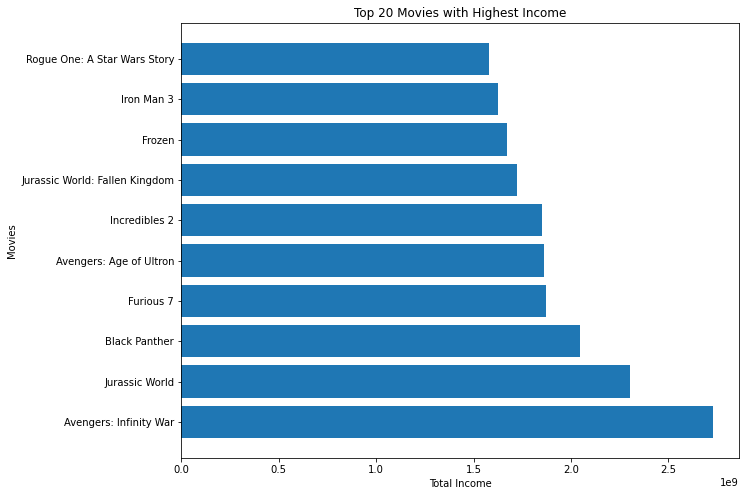

In [117]:
# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top20_movies["movie"], top20_movies["total_income"])
ax.set_xlabel("Total Income")
ax.set_ylabel("Movies")
ax.set_title("Top 20 Movies with Highest Income")

plt.show()

# Finding the top studios and how much income they generate
* We use 'new movie_df' which is a merged dataframe of 'bom.movies and 'tn.movies
*Plot showing the information

In [159]:
# Group the data by genre and calculates the sum of the domestic and worldwide gross
studio_income =new_movie_df.groupby('studio')[['domestic_gross_y', 'worldwide_gross']].sum().reset_index()

#Creating a new column 'total_gross' summing up the two columns
studio_income['total_gross'] = studio_income['domestic_gross_y'] + studio_income['worldwide_gross']

#Sort the data frame by the total gross in descending order and have the genres with the highest income appear at the top
studio_income = studio_income.sort_values('total_gross', ascending=False)

studio_income.head(10)

,studio,domestic_gross_y,worldwide_gross,total_gross
15,BV,1.292614e+10,3.328602e+10,4.621216e+10
90,Uni.,1.070684e+10,2.732929e+10,3.803613e+10
32,Fox,9.410234e+09,2.679581e+10,3.620605e+10
94,WB,9.130528e+09,2.219381e+10,3.132434e+10
82,Sony,7.059959e+09,1.760181e+10,2.466177e+10
69,Par.,6.007203e+09,1.443821e+10,2.044541e+10
95,WB (NL),3.417630e+09,8.540864e+09,1.195849e+10
48,LGF,3.332465e+09,6.983389e+09,1.031585e+10
64,P/DW,1.682915e+09,5.078028e+09,6.760942e+09
47,LG/S,1.499805e+09,3.815925e+09,5.315730e+09


# The top studios include:
* BV
* Uni.
* Fox
* WB
* Sony
* Par
* LGF
* P/DW
* LG/S

The studios enlisted above makes the highest total gross and Microsoft can indeed invest in these studios from movies produced or owned by these studios

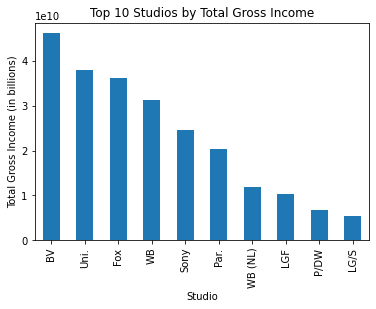

In [158]:
# select the top 10 studios by total gross income
top_10_studios = studio_income.head(10)

# plot a bar graph of the total gross income for each studio
top_10_studios.plot(x='studio', y='total_gross', kind='bar', legend=None)

# set the plot title and axis labels
plt.title('Top 10 Studios by Total Gross Income')
plt.xlabel('Studio')
plt.ylabel('Total Gross Income (in billions)')

# show the plot
plt.show()

# The Genres that brought the highest income
* To find this we merge the 'tn_df' and movieinfo_df
* The output will be the income based on the domestic and worldwide gross
* Plot showing the profitable genres


In [40]:
reviews_df = pd.merge(tn_df, movieinfo_df, how = "inner", left_on="id", right_on ="id")

In [41]:
# Group the data by genre and calculates the sum of the domestic and worldwide gross
genre_income = reviews_df.groupby('genre')[['domestic_gross', 'worldwide_gross']].sum().reset_index()

#Creating a new column 'total_gross' summing up the two columns
genre_income['total_gross'] = genre_income['domestic_gross'] + genre_income['worldwide_gross']

#Sort the data frame by the total gross in descending order and have the genres with the highest income appear at the top
genre_income = genre_income.sort_values('total_gross', ascending=False)

genre_income.head(5)

,genre,domestic_gross,worldwide_gross,total_gross
41,Drama|Mystery and Suspense,"$936,662,225$150,201,498$305,411,224$310,676,7...","$2,053,311,220$302,469,017$634,954,103$656,695...","$936,662,225$150,201,498$305,411,224$310,676,7..."
1,Action and Adventure|Art House and Internation...,"$92,054,159$133,501,348$54,647,948$89,296,573$...","$259,357,408$397,501,348$240,759,682$169,296,5...","$92,054,159$133,501,348$54,647,948$89,296,573$..."
37,Drama,"$89,302,115$417,719,760$122,523,060$42,779,261...","$260,002,115$1,305,772,799$375,740,705$232,017...","$89,302,115$417,719,760$122,523,060$42,779,261..."
31,Comedy|Kids and Family|Romance,"$80,101,125$206,445,654$217,536,138$203,464,10...","$409,953,905$626,549,695$767,820,459$515,419,8...","$80,101,125$206,445,654$217,536,138$203,464,10..."
2,Action and Adventure|Classics|Drama,"$760,507,625$293,004,164$111,506,430$30,212,62...","$2,776,345,279$731,463,377$269,806,430$49,628,...","$760,507,625$293,004,164$111,506,430$30,212,62..."


#  Find the correlation between the vote count and vote average
* We use the 'tmdbmovies. df
* Plot a scatter plot to show the correlation

In [42]:
# calculate correlation between vote_count and vote_average
corr = tmdb_df['vote_count'].corr(tmdb_df['vote_average'])

print('Correlation between vote_count and vote_average:', corr)

Correlation between vote_count and vote_average: 0.08636988831138752


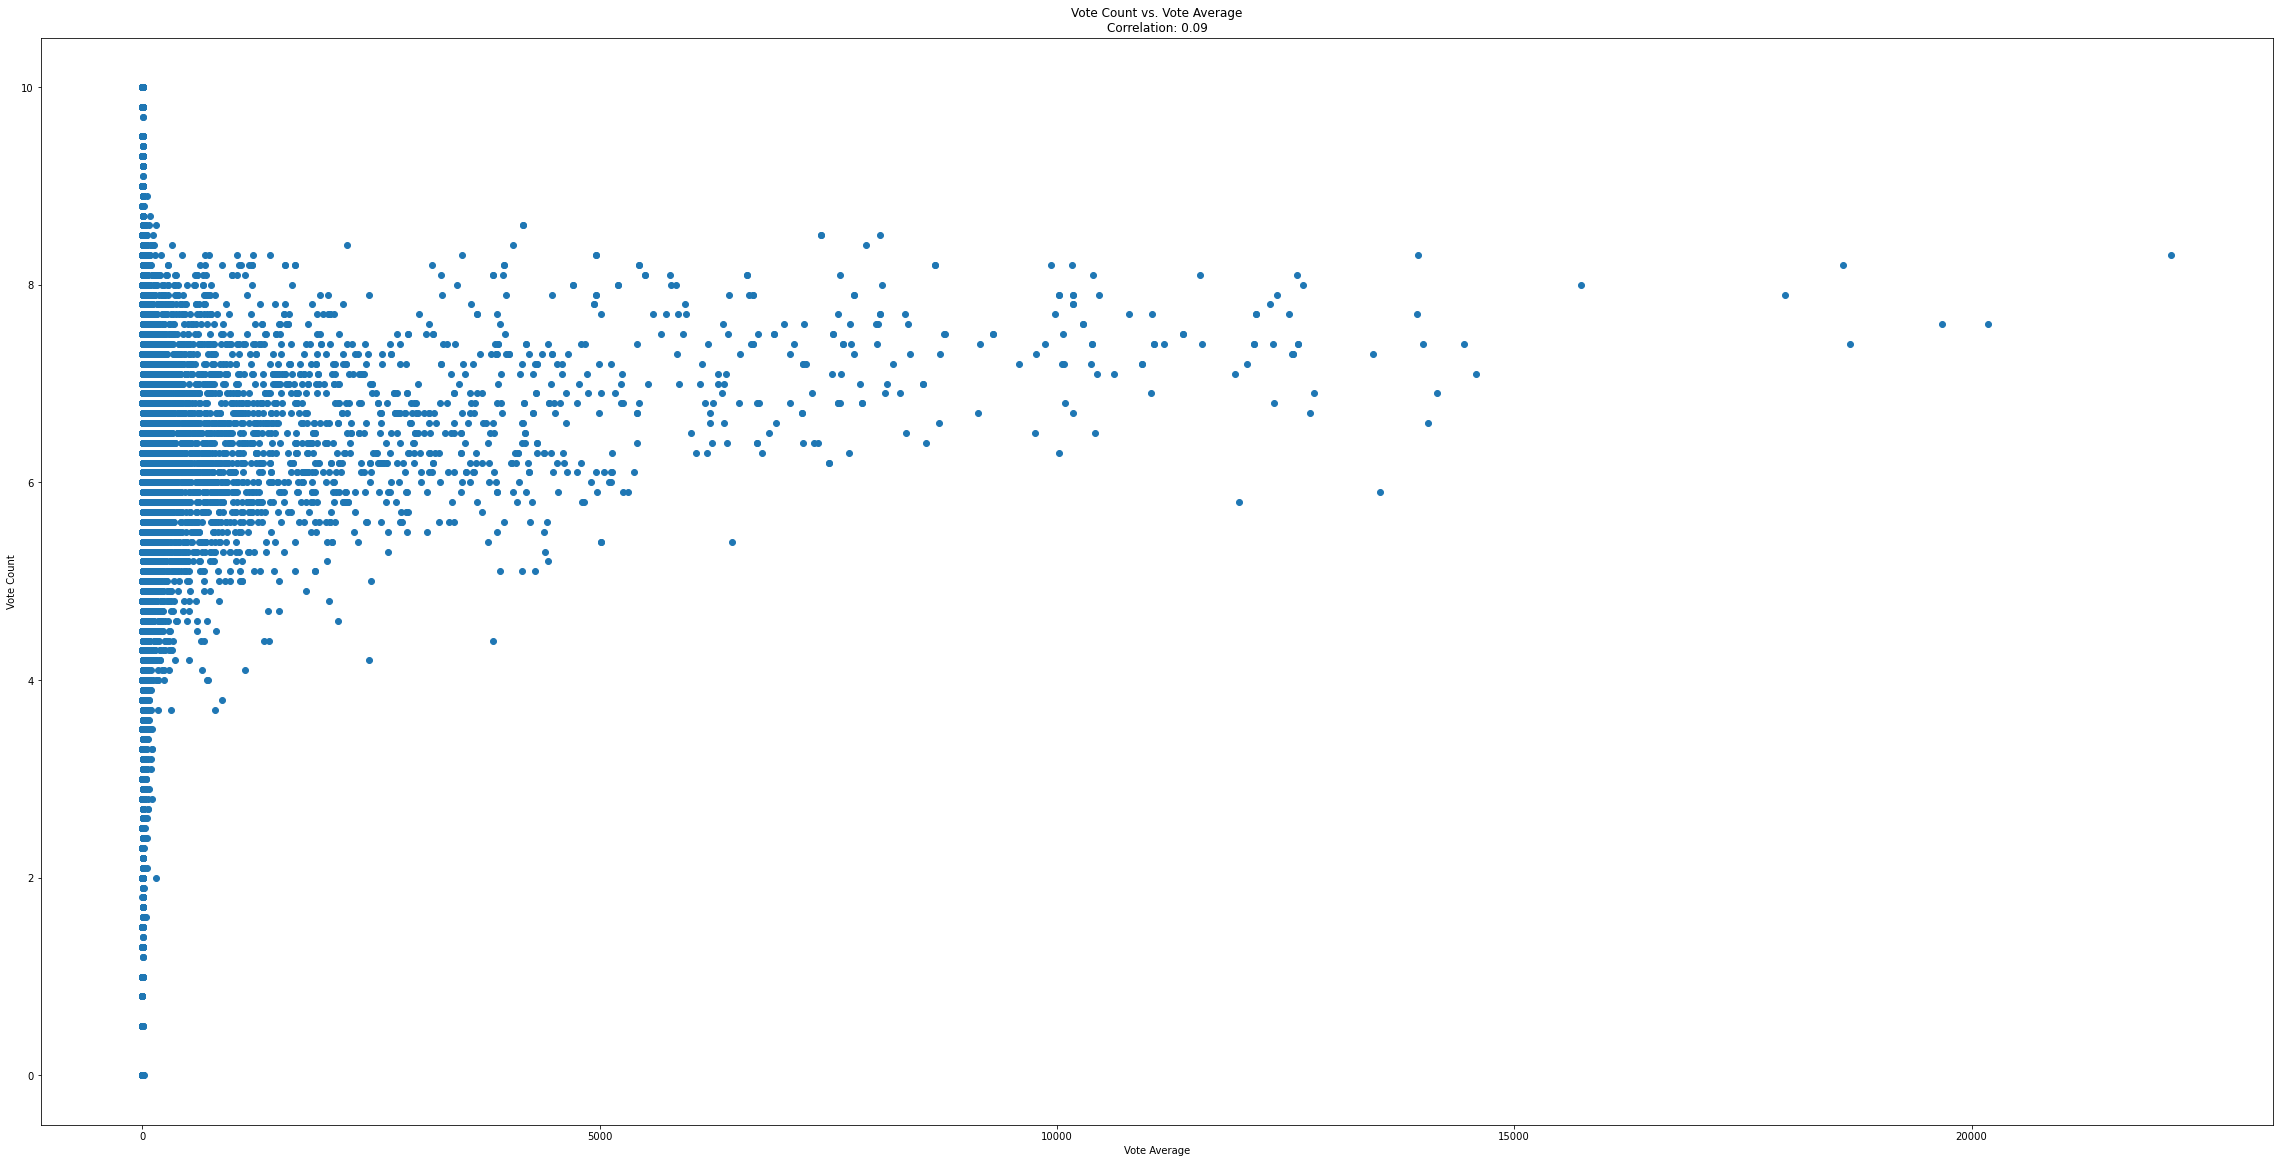

In [43]:
# plot scatter plot
#Plot the scatter plot
fig, ax = plt.subplots(figsize=(40, 20))

#Labeliing the axes
ax.scatter(tmdb_df['vote_count'], tmdb_df['vote_average'])
ax.set_xlabel('Vote Average')
ax.set_ylabel('Vote Count')
ax.set_title('Vote Count vs. Vote Average\nCorrelation: {:.2f}'.format(corr))
plt.show()

# Skewness and Kurtosis of the 'runtime'
* By examining the skewness and kurtosis of runtime in the movieinfo_df dataset, we can gain insights into how movie runtimes are distributed and how they compare to a normal distribution.
* This can be useful in understanding patterns in movie runtime and identifying any outliers or anomalies in the data. Box plots can also be helpful in visualizing these patterns and identifying any potential outliers.

In [44]:
# Read in the movieinfo_df DataFrame
movieinfo_df = pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')

# Change the 'runtime' column to numeric
movieinfo_df['runtime'] = movieinfo_df['runtime'].str.replace(' minutes', '').astype(float)


# Calculate the skewness and kurtosis of the "runtime" column
runtime_skew = movieinfo_df['runtime'].skew()
runtime_kurtosis = movieinfo_df['runtime'].kurtosis()

print('Runtime skewness:', runtime_skew)
print('Runtime kurtosis:', runtime_kurtosis)

Runtime skewness: 2.242613327185838
Runtime kurtosis: 17.572857716979282


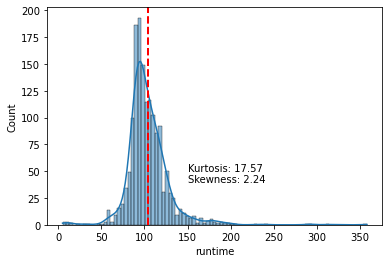

In [45]:
# Create a histogram of the "runtime" column
sns.histplot(movieinfo_df['runtime'], kde=True)

# Add a vertical line at the mean
plt.axvline(movieinfo_df['runtime'].mean(), color='r', linestyle='dashed', linewidth=2)

# Add text labels for the skewness and kurtosis
plt.text(150, 40, "Skewness: {:.2f}".format(movieinfo_df['runtime'].skew()))
plt.text(150, 50, "Kurtosis: {:.2f}".format(movieinfo_df['runtime'].kurtosis()))

# Show the plot
plt.show()